In [22]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/Coffee Shop Sales.xlsx')
df.head(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,6,2023-01-01,07:22:41,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,10,2023-01-01,07:39:34,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [23]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [24]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149111    False
149112    False
149113    False
149114    False
149115    False
Length: 149116, dtype: bool

In [25]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.duplicated().sum()

0

In [29]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [30]:
df.shape

(149116, 11)

In [31]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.time


In [37]:
numeric_columns = ['transaction_qty', 'unit_price','store_id']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)


In [38]:
correlation_matrix = df[numeric_columns].corr()
correlation_matrix


,transaction_qty,unit_price,store_id
transaction_qty,1.000000,-0.123546,-0.000794
unit_price,-0.123546,1.000000,0.001891
store_id,-0.000794,0.001891,1.000000


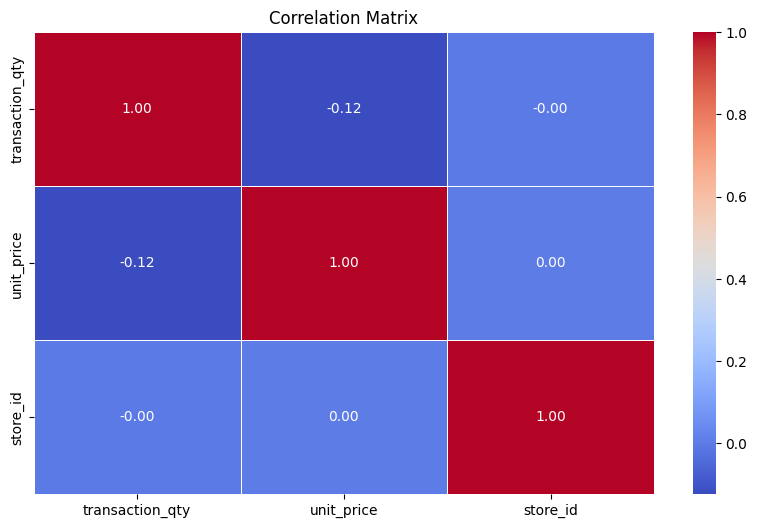

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**Univariate Analysis**


In [40]:
df.sample(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
146982,147319,2023-06-28,19:32:50,1,8,Hell's Kitchen,23,2.50,Coffee,Drip coffee,Our Old Time Diner Blend Rg
55026,55137,2023-04-01,10:18:21,2,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg
25716,25773,2023-02-15,11:09:08,1,8,Hell's Kitchen,74,3.50,Bakery,Biscotti,Ginger Biscotti
28119,28176,2023-02-19,10:52:34,1,3,Astoria,76,3.50,Bakery,Biscotti,Chocolate Chip Biscotti
82765,82939,2023-05-03,13:16:26,1,3,Astoria,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg


In [41]:
#COUNTPLOT
df.value_counts('store_location')

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

<Axes: xlabel='store_location', ylabel='count'>

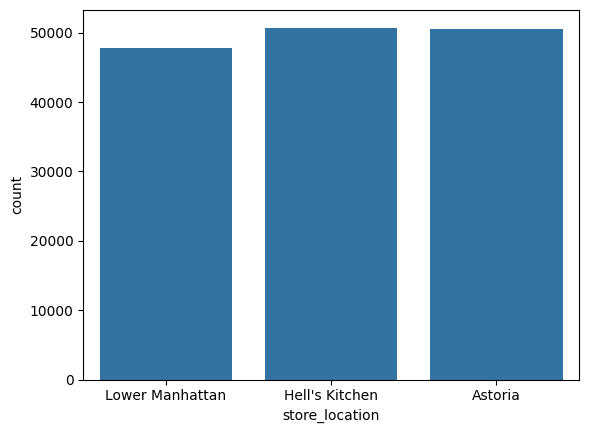

In [44]:
sns.countplot(x='store_location',data=df)
# sns.countplot(df["store_location"])

In [45]:
df.value_counts('store_id')

store_id
8    50735
3    50599
5    47782
Name: count, dtype: int64

<Axes: xlabel='store_id', ylabel='count'>

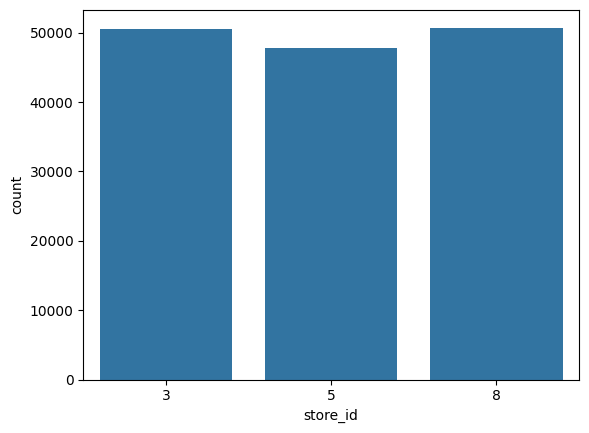

In [46]:
sns.countplot(x='store_id',data=df)

In [47]:
df.value_counts('store_location')

store_location
Hell's Kitchen     50735
Astoria            50599
Lower Manhattan    47782
Name: count, dtype: int64

<Axes: xlabel='store_location', ylabel='count'>

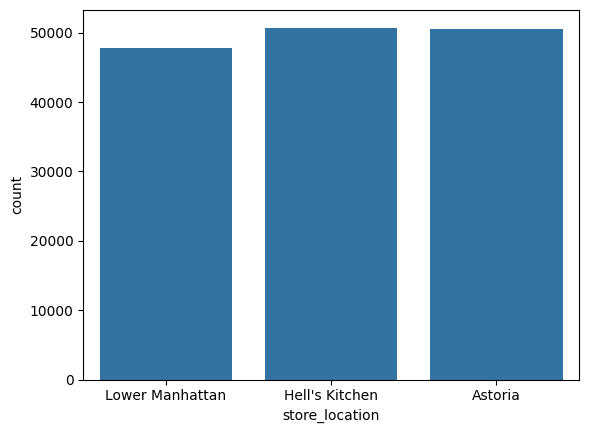

In [48]:
sns.countplot(x='store_location',data=df)

In [50]:
df.value_counts('product_category')
# sns.countplot(x='product_category',data=df)

product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

<Axes: xlabel='product_category', ylabel='count'>

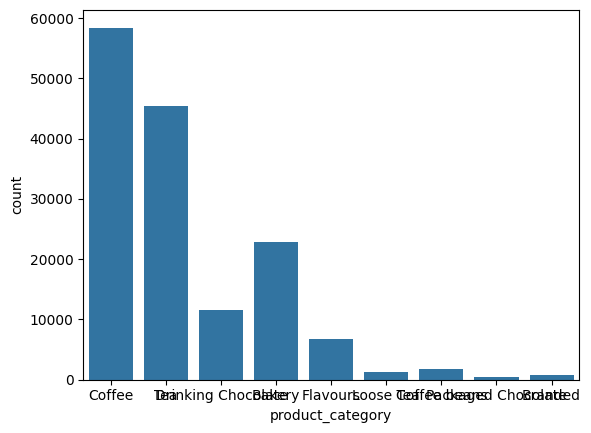

In [51]:
sns.countplot(x='product_category',data=df)

<Axes: ylabel='count'>

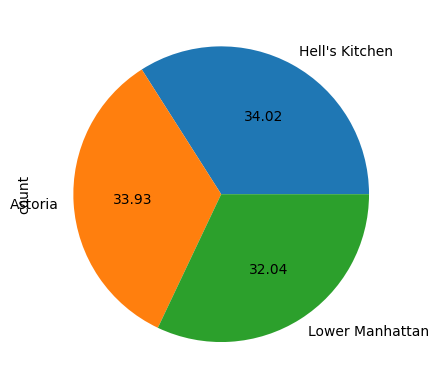

In [57]:
#pie chart for percentage representation
import matplotlib.pyplot as plt
df['store_location'].value_counts().plot(kind='pie', autopct='%.2f')

In [58]:
df['product_detail'].value_counts()

product_detail
Chocolate Croissant             3076
Earl Grey Rg                    3053
Dark chocolate Lg               3029
Morning Sunrise Chai Rg         3026
Columbian Medium Roast Rg       3013
                                ... 
Jamacian Coffee River            146
Earl Grey                        142
Guatemalan Sustainably Grown     134
Spicy Eye Opener Chai            122
Dark chocolate                   118
Name: count, Length: 80, dtype: int64

<Axes: ylabel='count'>

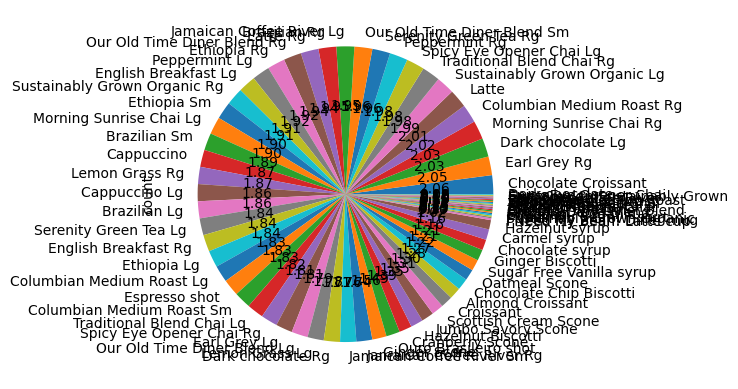

In [60]:
df['product_detail'].value_counts().plot(kind='pie',autopct='%.2f')
#no need for this

<Axes: ylabel='count'>

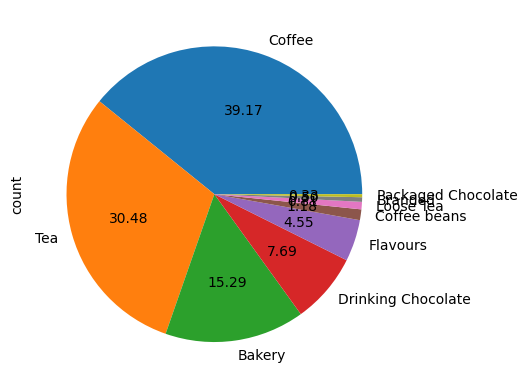

In [62]:
# product_category
df['product_category'].value_counts().plot(kind='pie',autopct='%.2f')


In [64]:
df['product_category'].value_counts()



product_category
Coffee                58416
Tea                   45449
Bakery                22796
Drinking Chocolate    11468
Flavours               6790
Coffee beans           1753
Loose Tea              1210
Branded                 747
Packaged Chocolate      487
Name: count, dtype: int64

## above were a few insights on how you can perform univariate analysis on categorical columns.
## below we will perform univariate analysis on numerical columns

**UNIVARIATE ANALYSIS ON NUMERICAL COLUMNS**

(array([ 1619.,  1344., 14682., 24907., 22531., 25782., 25696.,  7066.,
        18779.,  6710.]),
 array([ 1. ,  9.6, 18.2, 26.8, 35.4, 44. , 52.6, 61.2, 69.8, 78.4, 87. ]),
 <BarContainer object of 10 artists>)

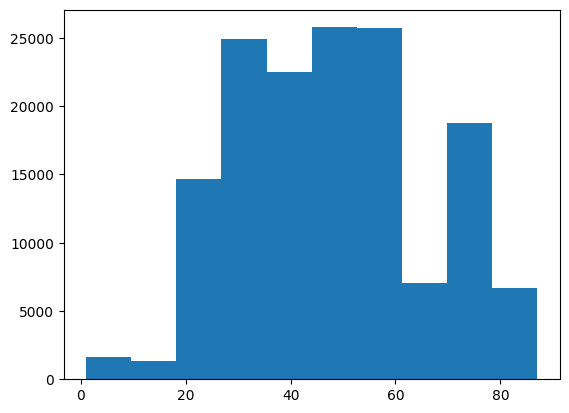

In [69]:
#HISTOGRAM
plt.hist(df['product_id'],bins=10)

(array([10235.,  9897., 10587., 11813., 12370., 15245., 16302., 20091.,
        19936., 22640.]),
 array([19358., 19376., 19394., 19412., 19430., 19448., 19466., 19484.,
        19502., 19520., 19538.]),
 <BarContainer object of 10 artists>)

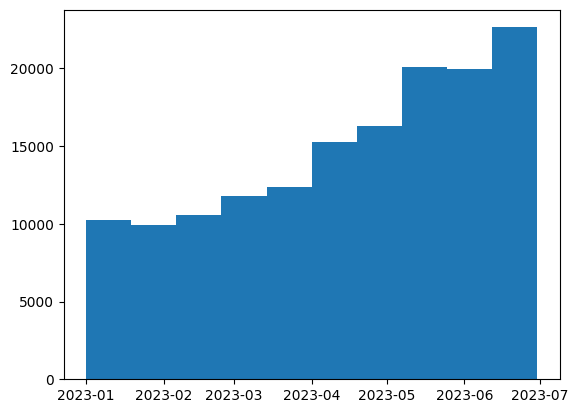

In [72]:

plt.hist(df['transaction_date'],bins=10)

(array([1.45801e+05, 3.27900e+03, 2.30000e+01, 3.00000e+00, 1.00000e+01]),
 array([1. , 2.4, 3.8, 5.2, 6.6, 8. ]),
 <BarContainer object of 5 artists>)

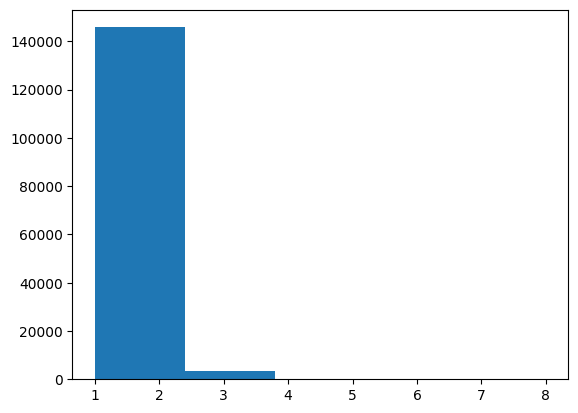

In [77]:
# sns.distplot(df['transaction_qty'])
plt.hist(df['transaction_qty'],bins=5)

In [74]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


<Axes: ylabel='unit_price'>

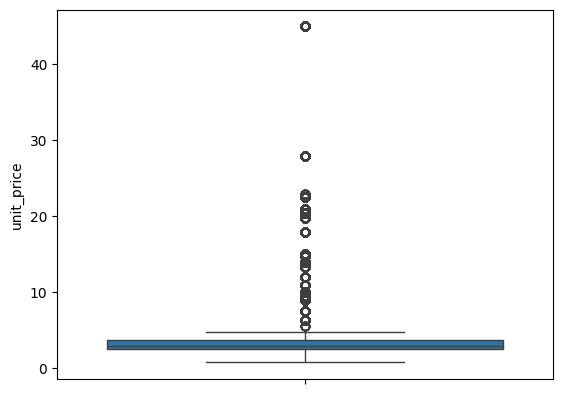

In [78]:
sns.boxplot(df['unit_price'])

<Axes: ylabel='transaction_qty'>

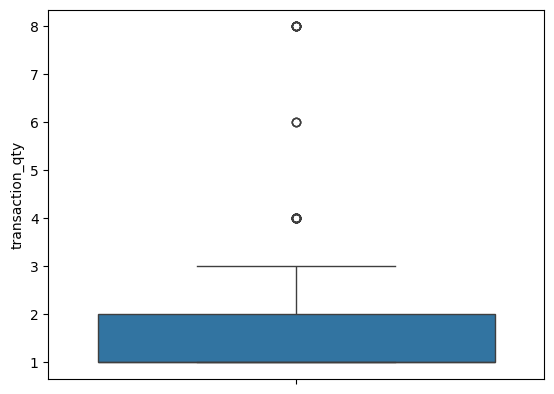

In [84]:
sns.boxplot(df['transaction_qty'])

In [79]:
df['unit_price'].min()

0.8

In [80]:
df['unit_price'].max()

45.0

In [81]:
df['transaction_qty'].min()

1

In [85]:
df['transaction_qty'].max()

8

In [83]:
df['transaction_qty'].mean()

1.438276241315486